In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
url = 'https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/AUC.csv'
df = pd.read_csv(url)

df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [22]:
df['author'] = df['author'].str.replace("Writtenby:", "", regex=False)
df['narrator'] = df['narrator'].str.replace("Narratedby:", "", regex=False)

df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [31]:
def convert_time_to_minutes(time_str):
    if pd.isna(time_str):
        return np.nan
    time_parts = time_str.split()
    total_minutes = 0
    for i, part in enumerate(time_parts):
        if part == 'hrs':
            total_minutes += int(time_parts[i-1]) * 60
        elif part == 'mins':
            total_minutes += int(time_parts[i-1])
    return total_minutes
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,123,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [35]:
df['time'].fillna(df['time'].median(), inplace=True)

df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,123,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [37]:
df.duplicated().sum()

0

In [54]:
df['releasedate'] = pd.to_datetime(df['releasedate'], format='%d-%m-%y', errors='coerce')
df['release_year'] = df['releasedate'].dt.year

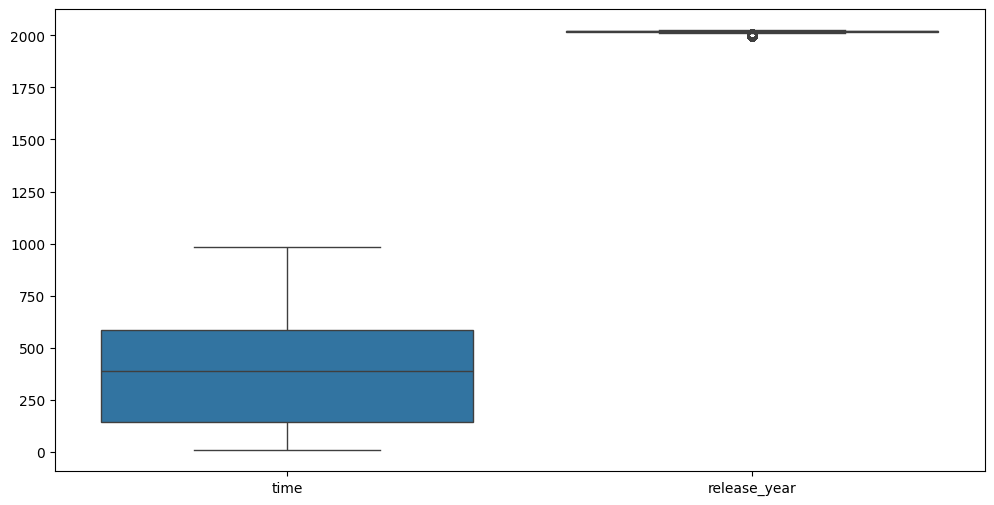

In [55]:
num_cols = ['time', 'release_year']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

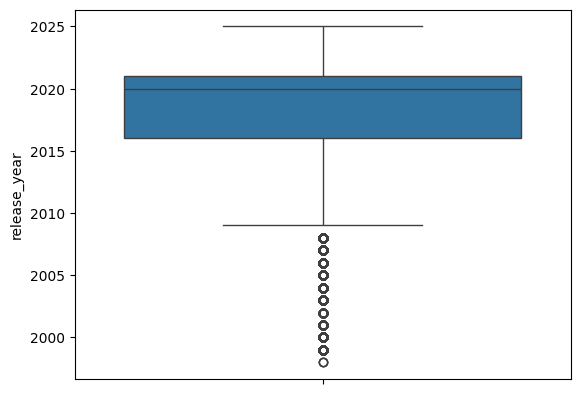

In [57]:
sns.boxplot(data=df['release_year'])
plt.show()

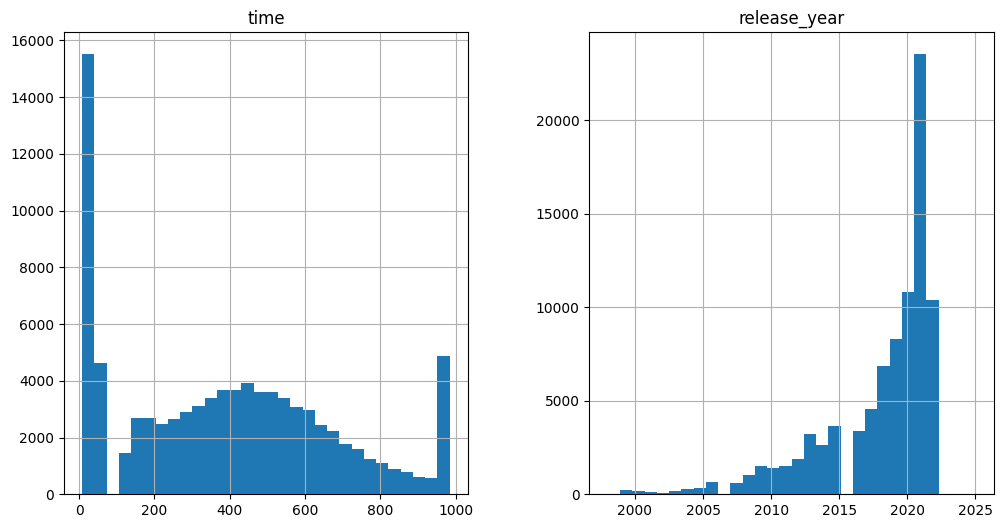

In [58]:
df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

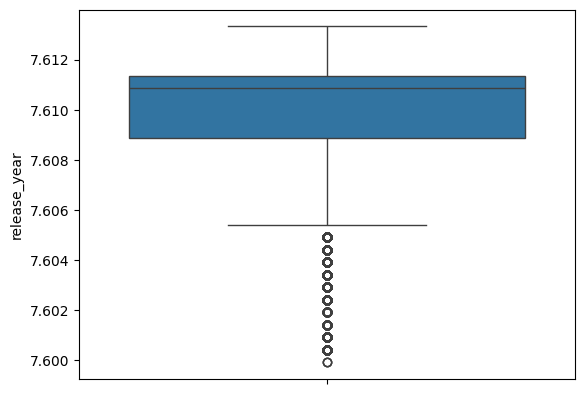

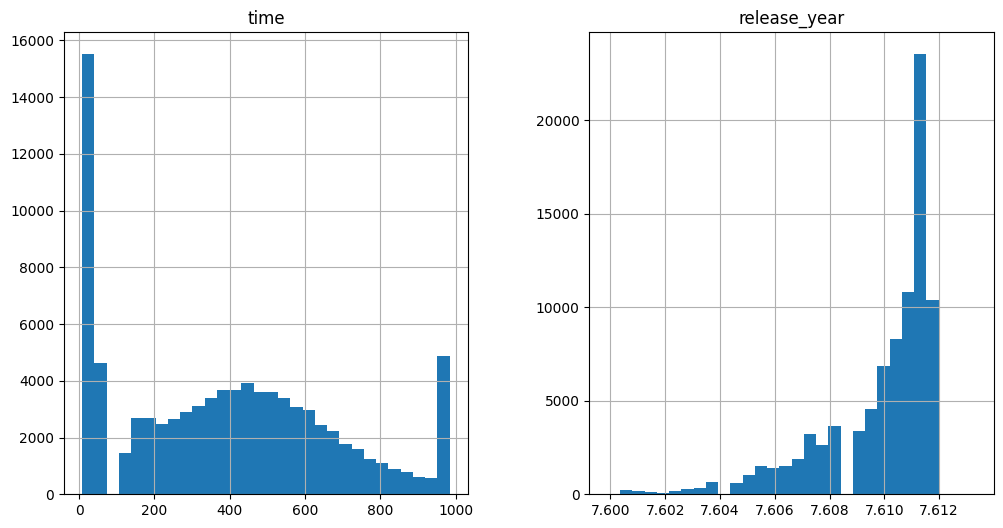

In [59]:
df['release_year'] = np.log(df['release_year'])

sns.boxplot(data=df['release_year'])

df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69990, 8), (17498, 8), (69990,), (17498,))

In [61]:
X

,name,author,narrator,time,releasedate,language,stars,release_year
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5 out of 5 stars34 ratings,7.604894
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5 out of 5 stars41 ratings,7.609862
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5 out of 5 stars38 ratings,7.610853
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5 out of 5 stars12 ratings,7.611348
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5 out of 5 stars181 ratings,7.605890
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017-09-03,English,Not rated yet,7.609367
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,Not rated yet,7.609367
87486,The Innocents Abroad,MarkTwain,FloGibson,984,2016-12-30,English,Not rated yet,7.608871
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011-02-23,English,Not rated yet,7.606387
